In [1]:
import pandas as pd

# Load Data and Separate Column Types

In [2]:
df = pd.read_excel("data/AmesHousing.xlsx")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [25]:
column_types = ["MS SubClass (Nominal)",
"MS Zoning (Nominal)",
"Lot Frontage (Continuous)",
"Lot Area (Continuous)",
"Street (Nominal)",
"Alley (Nominal)",
"Lot Shape (Ordinal)",
"Land Contour (Nominal)",
"Utilities (Ordinal)",
"Lot Config (Nominal)",
"Land Slope (Ordinal)",
"Neighborhood (Nominal)",
"Condition 1 (Nominal)",
"Condition 2 (Nominal)",
"Bldg Type (Nominal)",
"House Style (Nominal)",    
"Overall Qual (Ordinal)",
"Overall Cond (Ordinal)",
"Year Built (Discrete)",
"Year Remod/Add (Discrete)",
"Roof Style (Nominal)",
"Roof Matl (Nominal)",
"Exterior 1st (Nominal)",
"Exterior 2nd (Nominal)",
"Mas Vnr Type (Nominal)",
"Mas Vnr Area (Continuous)",
"Exter Qual (Ordinal)",
"Exter Cond (Ordinal)",
"Foundation (Nominal)",
"Bsmt Qual (Ordinal)",
"Bsmt Cond (Ordinal)",
"Bsmt Exposure (Ordinal)",
"BsmtFin Type 1 (Ordinal)",
"BsmtFin SF 1 (Continuous)",
"BsmtFin Type 2 (Ordinal)",
"BsmtFin SF 2 (Continuous)",
"Bsmt Unf SF (Continuous)",
"Total Bsmt SF (Continuous)",
"Heating (Nominal)",
"Heating QC (Ordinal)",
"Central Air (Nominal)",
"Electrical (Ordinal)",
"1st Flr SF (Continuous)",
"2nd Flr SF (Continuous)",
"Low Qual Fin SF (Continuous)",
"Gr Liv Area (Continuous)",
"Bsmt Full Bath (Discrete)",
"Bsmt Half Bath (Discrete)",
"Full Bath (Discrete)",
"Half Bath (Discrete)",
"Bedroom AbvGr (Discrete)",
"Kitchen AbvGr (Discrete)",
"Kitchen Qual (Ordinal)",
"TotRms AbvGrd (Discrete)",
"Functional (Ordinal)",
"Fireplaces (Discrete)",
"Fireplace Qu (Ordinal)",
"Garage Type (Nominal)",
"Garage Yr Blt (Discrete)",
"Garage Finish (Ordinal)",
"Garage Cars (Discrete)",
"Garage Area (Continuous)",
"Garage Qual (Ordinal)",
"Garage Cond (Ordinal)",
"Paved Drive (Ordinal)",
"Wood Deck SF (Continuous)",
"Open Porch SF (Continuous)",
"Enclosed Porch (Continuous)",
"3Ssn Porch (Continuous)",
"Screen Porch (Continuous)",
"Pool Area (Continuous)",
"Pool QC (Ordinal)",
"Fence (Ordinal)",
"Misc Feature (Nominal)",
"Misc Val (Continuous)",
"Mo Sold (Discrete)",
"Yr Sold (Discrete)",
"Sale Type (Nominal)",
"Sale Condition (Nominal)"]

In [26]:
metadata_cols = ["Order", "PID"]
continuous_cols = []
discrete_cols = []
nominal_cols = []
ordinal_cols = []

In [27]:
for c in column_types:
    pieces = c.split(" (")
    column_type = pieces[1].strip(")")
    column_name = pieces[0]
    if column_type == "Nominal":
        nominal_cols.append(column_name)
    elif column_type == "Ordinal":
        ordinal_cols.append(column_name)
    elif column_type == "Continuous":
        continuous_cols.append(column_name)
    elif column_type == "Discrete":
        discrete_cols.append(column_name)

In [28]:
len(nominal_cols) + len(ordinal_cols) + len(continuous_cols) + len(discrete_cols)

79

In [29]:
all_columns = nominal_cols + ordinal_cols + continuous_cols + discrete_cols

In [30]:
main_list = list(set(df.columns) - set(all_columns))
main_list

['Order', 'PID', 'SalePrice']

In [31]:
len(df.columns)

82

In [8]:
len(nominal_cols)

23

In [9]:
df[nominal_cols]

,MS SubClass,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,...,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Misc Feature,Sale Type,Sale Condition
0,20,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,1Fam,...,BrkFace,Plywood,Stone,CBlock,GasA,Y,Attchd,NaN,WD,Normal
1,20,RH,Pave,NaN,Lvl,Inside,NAmes,Feedr,Norm,1Fam,...,VinylSd,VinylSd,None,CBlock,GasA,Y,Attchd,NaN,WD,Normal
2,20,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,1Fam,...,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,Y,Attchd,Gar2,WD,Normal
3,20,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,1Fam,...,BrkFace,BrkFace,None,CBlock,GasA,Y,Attchd,NaN,WD,Normal
4,60,RL,Pave,NaN,Lvl,Inside,Gilbert,Norm,Norm,1Fam,...,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,NaN,Lvl,CulDSac,Mitchel,Norm,Norm,1Fam,...,HdBoard,HdBoard,None,CBlock,GasA,Y,Detchd,NaN,WD,Normal
2926,20,RL,Pave,NaN,Low,Inside,Mitchel,Norm,Norm,1Fam,...,HdBoard,HdBoard,None,CBlock,GasA,Y,Attchd,NaN,WD,Normal
2927,85,RL,Pave,NaN,Lvl,Inside,Mitchel,Norm,Norm,1Fam,...,HdBoard,Wd Shng,None,PConc,GasA,Y,NaN,Shed,WD,Normal
2928,20,RL,Pave,NaN,Lvl,Inside,Mitchel,Norm,Norm,1Fam,...,HdBoard,HdBoard,None,CBlock,GasA,Y,Attchd,NaN,WD,Normal


# Filling In Null Values

In [10]:
df[nominal_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2930 non-null   int64 
 1   MS Zoning       2930 non-null   object
 2   Street          2930 non-null   object
 3   Alley           198 non-null    object
 4   Land Contour    2930 non-null   object
 5   Lot Config      2930 non-null   object
 6   Neighborhood    2930 non-null   object
 7   Condition 1     2930 non-null   object
 8   Condition 2     2930 non-null   object
 9   Bldg Type       2930 non-null   object
 10  House Style     2930 non-null   object
 11  Roof Style      2930 non-null   object
 12  Roof Matl       2930 non-null   object
 13  Exterior 1st    2930 non-null   object
 14  Exterior 2nd    2930 non-null   object
 15  Mas Vnr Type    2907 non-null   object
 16  Foundation      2930 non-null   object
 17  Heating         2930 non-null   object
 18  Central 

In [11]:
nominal_fill_value = "none"
df[nominal_cols] = df[nominal_cols].fillna(nominal_fill_value)

In [12]:
df[ordinal_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Lot Shape       2930 non-null   object
 1   Utilities       2930 non-null   object
 2   Land Slope      2930 non-null   object
 3   Overall Qual    2930 non-null   int64 
 4   Overall Cond    2930 non-null   int64 
 5   Exter Qual      2930 non-null   object
 6   Exter Cond      2930 non-null   object
 7   Bsmt Qual       2850 non-null   object
 8   Bsmt Cond       2850 non-null   object
 9   Bsmt Exposure   2847 non-null   object
 10  BsmtFin Type 1  2850 non-null   object
 11  BsmtFin Type 2  2849 non-null   object
 12  Heating QC      2930 non-null   object
 13  Electrical      2929 non-null   object
 14  Kitchen Qual    2930 non-null   object
 15  Functional      2930 non-null   object
 16  Fireplace Qu    1508 non-null   object
 17  Garage Finish   2771 non-null   object
 18  Garage Q

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [14]:
df[nominal_cols].columns[df[nominal_cols].isna().any()].tolist()

[]

In [15]:
df[ordinal_cols].columns[df[ordinal_cols].isna().any()].tolist()

['Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Electrical',
 'Fireplace Qu',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence']

In [16]:
ordinal_fill_value = "none"
df[ordinal_cols] = df[ordinal_cols].fillna(ordinal_fill_value)

In [17]:
df[discrete_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      2930 non-null   int64  
 1   Year Remod/Add  2930 non-null   int64  
 2   Bsmt Full Bath  2928 non-null   float64
 3   Bsmt Half Bath  2928 non-null   float64
 4   Full Bath       2930 non-null   int64  
 5   Half Bath       2930 non-null   int64  
 6   Bedroom AbvGr   2930 non-null   int64  
 7   Kitchen AbvGr   2930 non-null   int64  
 8   TotRms AbvGrd   2930 non-null   int64  
 9   Fireplaces      2930 non-null   int64  
 10  Garage Yr Blt   2771 non-null   float64
 11  Garage Cars     2929 non-null   float64
 12  Mo Sold         2930 non-null   int64  
 13  Yr Sold         2930 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 320.6 KB


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [19]:
df[discrete_cols].columns[df[discrete_cols].isna().any()].tolist()

['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars']

In [20]:
df[discrete_cols] = df[discrete_cols].fillna(0)
df[discrete_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year Built      2930 non-null   int64  
 1   Year Remod/Add  2930 non-null   int64  
 2   Bsmt Full Bath  2930 non-null   float64
 3   Bsmt Half Bath  2930 non-null   float64
 4   Full Bath       2930 non-null   int64  
 5   Half Bath       2930 non-null   int64  
 6   Bedroom AbvGr   2930 non-null   int64  
 7   Kitchen AbvGr   2930 non-null   int64  
 8   TotRms AbvGrd   2930 non-null   int64  
 9   Fireplaces      2930 non-null   int64  
 10  Garage Yr Blt   2930 non-null   float64
 11  Garage Cars     2930 non-null   float64
 12  Mo Sold         2930 non-null   int64  
 13  Yr Sold         2930 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 320.6 KB


In [32]:
df[continuous_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lot Frontage     2440 non-null   float64
 1   Lot Area         2930 non-null   int64  
 2   Mas Vnr Area     2907 non-null   float64
 3   BsmtFin SF 1     2929 non-null   float64
 4   BsmtFin SF 2     2929 non-null   float64
 5   Bsmt Unf SF      2929 non-null   float64
 6   Total Bsmt SF    2929 non-null   float64
 7   1st Flr SF       2930 non-null   int64  
 8   2nd Flr SF       2930 non-null   int64  
 9   Low Qual Fin SF  2930 non-null   int64  
 10  Gr Liv Area      2930 non-null   int64  
 11  Garage Area      2929 non-null   float64
 12  Wood Deck SF     2930 non-null   int64  
 13  Open Porch SF    2930 non-null   int64  
 14  Enclosed Porch   2930 non-null   int64  
 15  3Ssn Porch       2930 non-null   int64  
 16  Screen Porch     2930 non-null   int64  
 17  Pool Area     

In [34]:
df[continuous_cols] = df[continuous_cols].fillna(0)

In [92]:
class OneHotEncoding:
    
    def __init__ (self, name):
        self.name = name
        self.categories = []
        
    def fit(self, series):
        self.categories = series.value_counts().to_dict().keys() 
    
    def transform(self, series : pd.Series)->pd.DataFrame:
        df = pd.DataFrame(index=series.index)
        for category in self.categories:
            df[series.name + str(category)] = (category == series).astype("int")
        return df

In [93]:
input_columns = discrete_cols + continuous_cols

In [94]:
for column in df.columns:
    if column in ordinal_cols or column in nominal_cols:
        encoding = OneHotEncoding(column)
        one_hot_df = encoding.transform(df[column])
        df[one_hot_df.columns] = one_hot_df
        input_columns += one_hot_df.columns.to_list()

In [78]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Sale TypeConLw,Sale TypeOth,Sale TypeCon,Sale TypeVWD,Sale ConditionNormal,Sale ConditionPartial,Sale ConditionAbnorml,Sale ConditionFamily,Sale ConditionAlloca,Sale ConditionAdjLand
0,1,526301100,20,RL,141.0,31770,Pave,none,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
1,2,526350040,20,RH,80.0,11622,Pave,none,Reg,Lvl,...,0,0,0,0,1,0,0,0,0,0
2,3,526351010,20,RL,81.0,14267,Pave,none,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
3,4,526353030,20,RL,93.0,11160,Pave,none,Reg,Lvl,...,0,0,0,0,1,0,0,0,0,0
4,5,527105010,60,RL,74.0,13830,Pave,none,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,none,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
2926,2927,923276100,20,RL,0.0,8885,Pave,none,IR1,Low,...,0,0,0,0,1,0,0,0,0,0
2927,2928,923400125,85,RL,62.0,10441,Pave,none,Reg,Lvl,...,0,0,0,0,1,0,0,0,0,0
2928,2929,924100070,20,RL,77.0,10010,Pave,none,Reg,Lvl,...,0,0,0,0,1,0,0,0,0,0


In [81]:
len(input_columns)

352

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[all_columns], df["SalePrice"], test_size=0.33, random_state=42)

In [97]:
encoders = {}
for column in df.columns:
    if column in ordinal_cols or column in nominal_cols:
        encoding = OneHotEncoding(column)
        encoding.fit(X_train[column])
        encoders[column] = encoding

In [98]:
for column in df.columns:
    if column in ordinal_cols or column in nominal_cols:
        encoding = encoders[column]
        one_hot_df = encoding.transform(X_train[column])
        X_train[one_hot_df.columns] = one_hot_df
        one_hot_df = encoding.transform(X_test[column])
        X_test[one_hot_df.columns] = one_hot_df
        input_columns += one_hot_df.columns.to_list()

In [99]:
regression = LinearRegression()
regression.fit(X=X_train[input_columns], y=y_train)

LinearRegression()

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
predictions = regression.predict(X_test[input_columns])

In [103]:
regression.coef_

array([ 3.88602637e+02,  6.02666712e+01,  9.16518235e+02,  3.23109939e+02,
        3.57447100e+03,  1.16186800e+03, -2.59275771e+03, -8.50622664e+03,
       -3.13543062e+02,  7.09434042e+03,  2.65276335e+01,  4.87168166e+03,
        4.80046081e+01, -6.61394743e+02,  2.51892498e+01,  5.86133977e-01,
        1.42514658e+01,  1.80131402e+01,  1.07871363e+01, -3.20825326e+00,
        2.55919643e+01,  1.55307455e+01,  3.05079255e+01, -1.01587163e+01,
        3.58798898e+01,  5.76790246e+00,  1.27928527e+01,  2.54981830e+00,
        1.03678656e+01,  3.57544310e+01,  5.44414436e+01, -8.99931840e+01,
       -2.59350266e-01,  7.70829580e+03,  8.43503604e+03,  1.45984619e+04,
       -1.48829040e+04,  1.60234368e+04,  1.17770357e+04, -1.56586830e+04,
       -1.36410106e+03, -6.10669549e+03, -7.62580134e+03, -1.98372981e+03,
        1.96097114e+02, -1.83725800e+04, -6.70244884e+03,  1.39585802e+04,
        1.55284344e+02, -5.06094339e+03, -6.67966630e+02,  7.74864502e+03,
       -1.51354876e+04, -

In [104]:
predictions

array([ 1.65695161e+05,  1.09105556e+05,  1.94229086e+05,  1.35613904e+05,
        1.27922122e+05,  1.93800008e+05,  1.70881257e+05,  1.49842241e+05,
        9.13198937e+04,  3.58298517e+05,  2.23077557e+05,  2.42950549e+05,
        5.92648899e+04,  1.37182149e+05,  4.40828849e+04,  1.76316492e+05,
        1.35871260e+05,  1.86165441e+05,  1.22429585e+05,  1.43984595e+05,
        1.75822687e+05,  1.37999134e+05,  1.98585983e+05,  1.95971222e+05,
        1.96507121e+05,  2.83638664e+05,  3.69002497e+05,  2.28160646e+05,
        1.92962534e+05,  2.33513611e+05,  1.90267176e+05,  8.64415035e+04,
        2.17282730e+05,  8.51349317e+04,  1.18139302e+05,  5.50128405e+04,
        1.92793015e+05,  3.14712120e+05,  1.86939212e+05,  2.72801648e+05,
        3.73870348e+05,  2.46082415e+05,  2.53593804e+05,  1.90855904e+05,
        1.31934771e+05,  3.22430077e+05,  1.85825670e+05,  1.53316384e+05,
        1.75754286e+05,  1.11457307e+05,  1.81355764e+05,  1.36780741e+05,
        1.41596077e+05,  

In [105]:
evaluation_df = pd.DataFrame({"ActualPrice":y_test, "ModelPrice":predictions})

In [106]:
evaluation_df

,ActualPrice,ModelPrice
1357,161000,165695.160790
2367,116000,109105.555907
2822,196500,194229.086442
2126,123600,135613.904469
1544,126000,127922.121889
...,...,...
1173,170000,180283.273690
2874,72000,44803.975946
344,189500,191499.201379
839,207000,204169.715561


In [107]:
import numpy as np
print(np.sqrt(mean_squared_error(y_test, predictions)))
print(mean_absolute_error(y_test, predictions))

26227.571162628905
15151.532558157069


<AxesSubplot:xlabel='ActualPrice', ylabel='ModelPrice'>

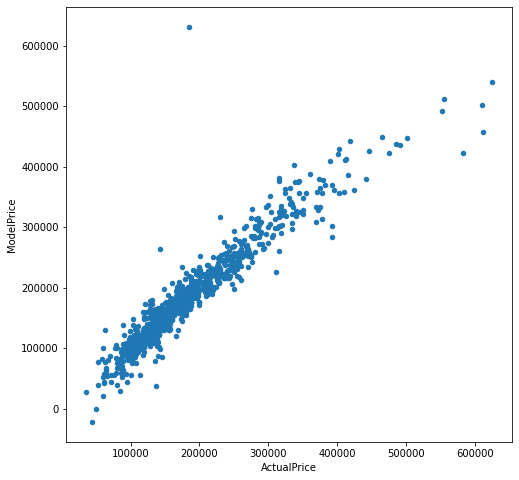

In [109]:
evaluation_df.plot(kind="scatter", x="ActualPrice", y="ModelPrice", figsize=(8,8))